### Dominant Color Extraction for Image Segmentation
- Image Segmentation
-Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
-We will try to extract the most dominant 'K' Colors using K-Means
-We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

In [1]:
import matplotlib.pyplot as plt

In [15]:
import cv2
import numpy as np

In [24]:
im=cv2.imread('elephant.jpg') #BGR

#convert
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape=im.shape
print(im.shape)

(330, 500, 3)


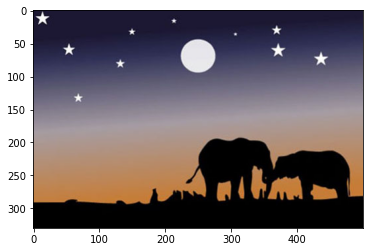

In [6]:
plt.imshow(im)
plt.show()

In [9]:
# Flatten Each channel of the Image
all_pixels=im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [10]:
from sklearn.cluster import KMeans

In [12]:
dominant_colors=4

km=KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=4)

In [13]:
centres=km.cluster_centers_

In [16]:
centers = np.array(centres,dtype='uint8')
print(centers)

[[ 38  35  64]
 [175 145 128]
 [  1   0   1]
 [ 99  95 118]]


## Plot what all colors are these ?

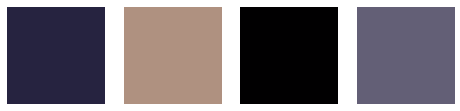

In [19]:
i=1

plt.figure(0,figsize=(8,2))
colors=[]

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)

plt.show()

### Segmenting Our Original Image¶

In [20]:
new_img = np.zeros((330*500,3),dtype='uint8')

print(new_img.shape)

(165000, 3)


In [21]:
colors

[array([38, 35, 64], dtype=uint8),
 array([175, 145, 128], dtype=uint8),
 array([1, 0, 1], dtype=uint8),
 array([ 99,  95, 118], dtype=uint8)]

In [22]:
km.labels_

array([0, 0, 0, ..., 2, 2, 2])

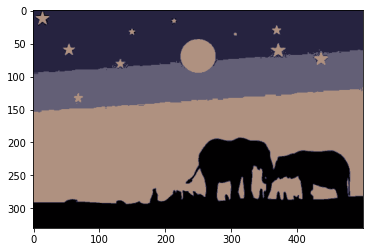

In [25]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()